In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/SGP/creditcard.csv')

In [ ]:
# Step 2: Preprocess the data
# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Labels (the last column)

In [ ]:
# Step 2: Handle missing values using KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors for imputation
X_imputed = knn_imputer.fit_transform(X)  # Impute missing values

In [ ]:
# Step 3: Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)  # Scale the data to have zero mean and unit variance

In [ ]:
# Step 4: Reduce dimensionality using PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)  # 2 clusters
gmm.fit(X_pca)
gmm_labels = gmm.predict(X_pca)

In [ ]:
# Step 7: Evaluate the Model
# 1. Silhouette Score
silhouette_avg = silhouette_score(X_pca, gmm_labels)
print(f"Silhouette Score (GMM): {silhouette_avg:.3f}")

# 2. Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(y, gmm_labels)
print(f'Adjusted Rand Index (ARI): {ari_score:.3f}')

# 3. Davies-Bouldin Index (DBI)
db_score = davies_bouldin_score(X_pca, gmm_labels)
print(f'Davies-Bouldin Index (DBI): {db_score:.3f}')

Silhouette Score (GMM): 0.046
Adjusted Rand Index (ARI): -0.000
Davies-Bouldin Index (DBI): 4.587


In [ ]:
# Step 7: Visualize the GMM Clusters Using PCA (2D)
# Further reduce dimensionality to 2 components for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

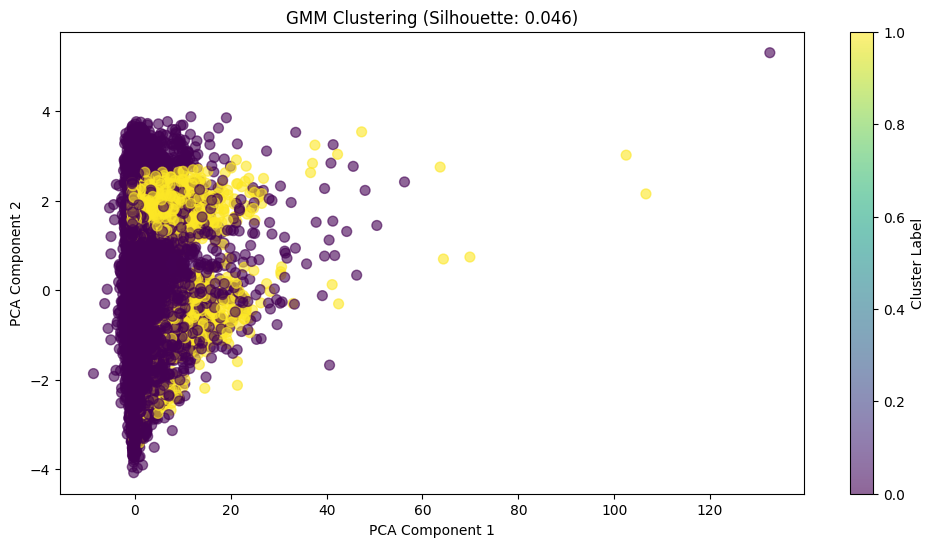

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=gmm_labels, cmap='viridis', s=50, alpha=0.6)
plt.title(f'GMM Clustering (Silhouette: {silhouette_avg:.3f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()